29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.7305 - loss: 0.7421 - val_accuracy: 0.8658 - val_loss: 0.3735
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8700 - loss: 0.3598 - val_accuracy: 0.8846 - val_loss: 0.3229
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.8891 - loss: 0.3040 - val_accuracy: 0.8947 - val_loss: 0.2932
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8896 - loss: 0.3120
Test Accuracy: 0.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted class: Ankle boot


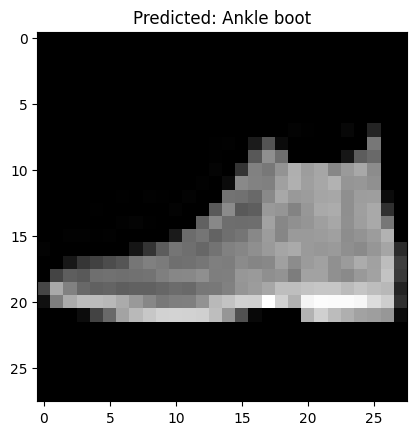

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape data to fit the CNN input requirements
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize and reshape
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a smaller model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (Reduce epochs to speed up)
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Example Prediction
sample_image = x_test[0:1]
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Map the predicted class to the corresponding label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Predicted class: {class_names[predicted_class]}")

# Display the image
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()
